In [38]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [179]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, validation_curve,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae, confusion_matrix
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import time
import sklearn.metrics as eva
from sklearn.tree import export_graphviz
import pydot

In [31]:
df.shape

(150, 4)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
xtrain, xtest, ytrain, ytest = train_test_split(df, y, test_size=0.25, random_state = 100)

In [129]:
param_grid = {'max_depth': np.arange(1, 10),
              'criterion': ['gini', 'entropy']}

tree = GridSearchCV(DecisionTreeClassifier(random_state =0), param_grid, scoring='accuracy')

tree.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [130]:
tree.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state =0, criterion= 'gini', max_depth= 2)
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [187]:
ytree_pred = dtree.predict_proba(xtest)

In [188]:
tree_acc = accuracy_score(ytest, dtree.predict(xtest))
tree_acc

0.9473684210526315

In [189]:
f1_tree = f1_score(ytest, dtree.predict(xtest), average= 'weighted')
f1_tree

0.9473684210526315

In [190]:
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()

for i in range(0, 3):
    fpr1[i], tpr1[i], _ = roc_curve(np.array(pd.get_dummies(ytest))[:, i], np.array(pd.get_dummies(dtree.predict(xtest)))[:, i])
    roc_auc1[i] = auc(fpr[i], tpr[i])

In [191]:
fpr1["micro"], tpr1["micro"], _ = roc_curve(np.array(pd.get_dummies(ytest)).ravel(),  np.array(pd.get_dummies(KNN.predict(xtest))).ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

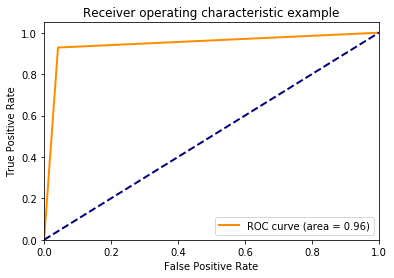

In [192]:
plt.figure()
lw = 2
plt.plot(fpr1[2], tpr1[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [193]:
export_graphviz(dtree, out_file = 'C:/Users/CompuTek/Desktop/Descision Tree/iris.dot', 
               feature_names= iris.feature_names, class_names= iris.target_names,
               rounded = True, filled = True)

In [194]:
(graph, ) = pydot.graph_from_dot_file('C:/Users/CompuTek/Desktop/Descision Tree/iris.dot')
graph.write_png('C:/Users/CompuTek/Desktop/Descision Tree/iris.png')

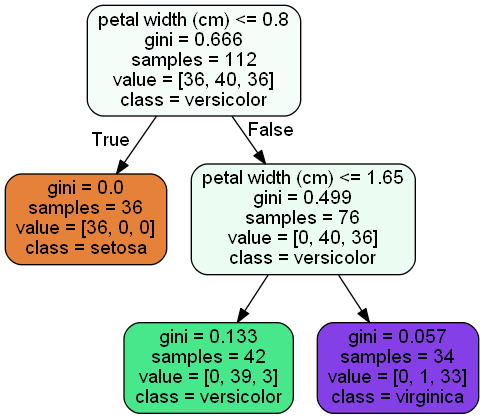

In [195]:
Image('C:/Users/CompuTek/Desktop/Descision Tree/iris.png')

# KNN

In [134]:
grid_params = {'n_neighbors' : list(range(1, 11)),
                'weights' : ['uniform', 'distance'], 
                 'metric' : ['euclidean'],
                  'p' : [1, 2, 3],
                'algorithm': ['ball_tree', 'kd_tree']
              }

In [135]:
GS = GridSearchCV(KNeighborsClassifier(), grid_params, cv=10, verbose = 1, scoring='accuracy', return_train_score=True)


In [136]:
knn = GS.fit(xtrain, ytrain)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    4.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [137]:
knn.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [138]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(algorithm= 'ball_tree', metric= 'euclidean', n_neighbors = 5, p = 1, weights= 'distance')
KNN.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='distance')

In [139]:
yknn_pred = KNN.predict_proba(xtest)

In [140]:
knn_acc = accuracy_score(ytest, KNN.predict(xtest))
knn_acc

0.9736842105263158

In [172]:
KNN.predict(xtest)

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1])

In [147]:
f1_knn = f1_score(ytest, KNN.predict(xtest), average= 'weighted')
f1_knn

0.973823447507658

In [165]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0, 3):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(ytest))[:, i], np.array(pd.get_dummies(KNN.predict(xtest)))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [169]:
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(ytest)).ravel(),  np.array(pd.get_dummies(KNN.predict(xtest))).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

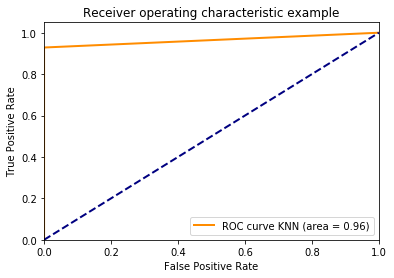

In [197]:
plt.figure()
lw = 2

plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve KNN (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for both KNN & Descision Tree

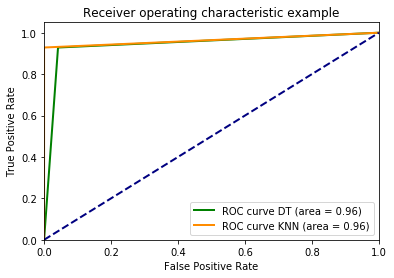

In [196]:
plt.figure()
lw = 2
plt.plot(fpr1[2], tpr1[2], color='green', lw=lw, label='ROC curve DT (area = %0.2f)' % roc_auc1[2])

plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve KNN (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [204]:
evaluation = pd.DataFrame([['Decision Tree', tree_acc, f1_tree],
                           ['KNN', knn_acc, f1_knn]],
                        columns=['Model', 'Accuracy Score', 'F1 Score'])
evaluation

,Model,Accuracy Score,F1 Score
0,Decision Tree,0.947368,0.947368
1,KNN,0.973684,0.973823
